<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/speech-recognition/Assignments/Students-Assignments/MTech-AI-SR-Prerit_Gupta-R001/Assignment%201/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
!pip install gTTS
!pip install SpeechRecognition

In [52]:
import os
path = "/content/drive/MyDrive/Colab Notebooks/Speech Recognition/Assignment 1/"



---

# Generating speech from text

In [51]:
from gtts import gTTS

In [22]:
Sentences = ["Hippopotomonstrosesquipedaliophobia is the fear of long words",
             "Floccinaucinihilipilification means the estimation of something as worthless",
             "Scripturient means having a strong urge to write",
             "Sesquipedalian person is one who uses long words",
             "Perspicacity is the quality of having a ready insight into things",
             "Ostentation is showy display of wealth and luxury",
             "Muliebrity is womanly qualities"]

In [28]:
for i in Sentences:
  gtts_object = gTTS(text=i,lang="en",slow=False)
  gtts_object.save(os.path.join(path, "Audio files/{}.wav").format(i.split()[0]))

In [ ]:
import librosa

In [30]:
import os

In [70]:
Sound_dir = os.listdir(os.path.join(path, "Audio files/"))

In [ ]:
Sound_files = []
for i in Sound_dir:
  x = i[:-4]
  sr = i[:-4]+"_sr"
  x, sr = librosa.load(os.path.join(path, "Audio files/{}".format(i)))
  Sound_files.append([x, sr])

In [74]:
import numpy as np
np.shape(Sound_files)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(7, 2)



---

## Visualizing audio

In [188]:
import IPython.display as ipd

In [194]:
ipd.Audio(os.path.join(path, "Audio files/{}".format(Sound_dir[0])))

In [75]:
import matplotlib.pyplot as plt
import librosa.display

In [102]:
Sound_dir

['Hippopotomonstrosesquipedaliophobia.wav',
 'Floccinaucinihilipilification.wav',
 'Scripturient.wav',
 'Sesquipedalian.wav',
 'Perspicacity.wav',
 'Ostentation.wav',
 'Muliebrity.wav']

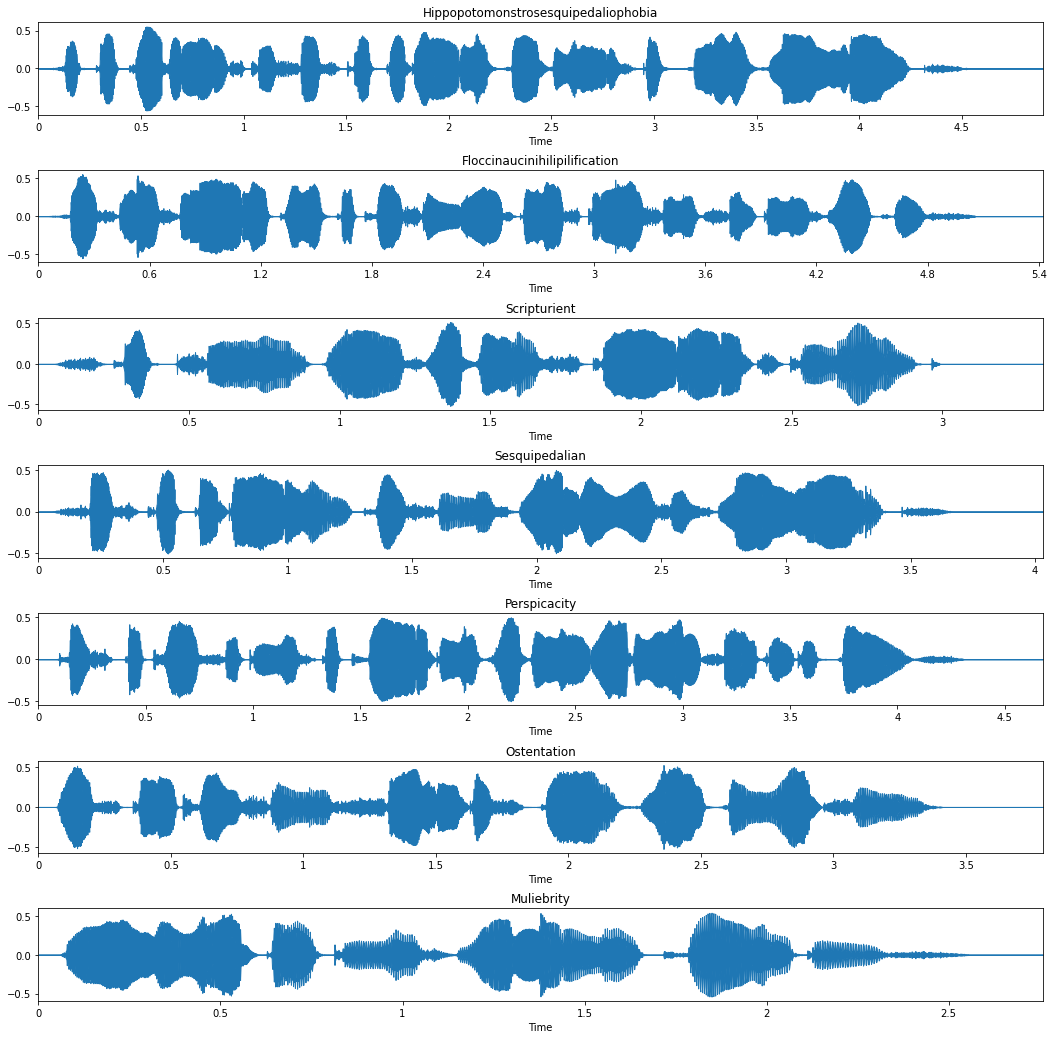

In [133]:
fig, axs = plt.subplots(7, figsize=(18,18))
plt.subplots_adjust(hspace=0.6)
for i in range(len(Sound_files)):
  axs[i].title.set_text(Sound_dir[i][:-4])
  librosa.display.waveplot(Sound_files[i][0], sr=Sound_files[i][1], ax=axs[i])


- Above plot shows the amplitude of all the sound tracks against time.
Flat regions show that there is a gap between the words.

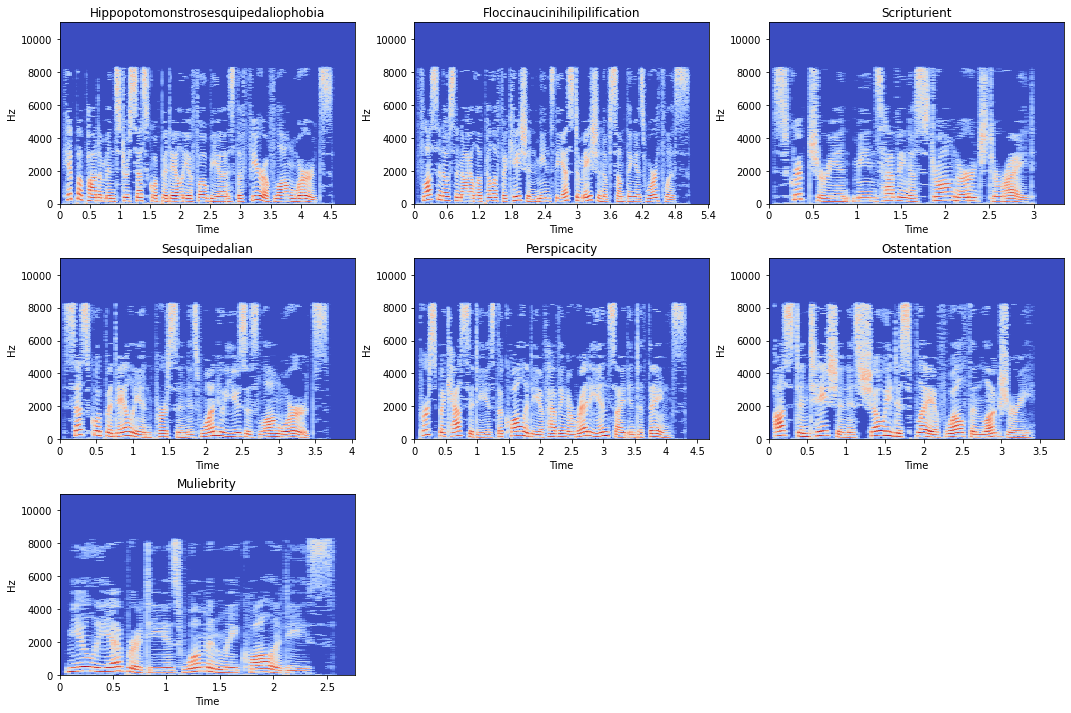

In [196]:
fig, axs = plt.subplots(3,3, figsize=(18,12))
plt.subplots_adjust(hspace=0.3)
counter1 = 0
counter2 = 0
for i in range(len(Sound_files)):
  axs[counter1][counter2].title.set_text(Sound_dir[i][:-4])
  X = librosa.stft(Sound_files[i][0])
  Xdb = librosa.amplitude_to_db(abs(X))
  librosa.display.specshow(Xdb, sr=Sound_files[i][1], x_axis='time', y_axis='hz',ax=axs[counter1][counter2])
  counter2 += 1
  if counter2>2:
    counter1 += 1
    counter2 = 0
fig.delaxes(axs[2][2])
fig.delaxes(axs[2][1])

- Above spectrogram shows the strength of the audio against time.



---

# Recognizing words from speech

In [187]:
import speech_recognition as sr

In [186]:
r = sr.Recognizer()
sample_audio = sr.AudioFile(os.path.join(path, 'recorded_audio.wav'))
with sample_audio as source:
    audio = r.record(source) #duration
r.recognize_google(audio)

'they called your voice speaking English and in Need for Speed recognizer used car record audio'

- Speech recognizer did not pick up some english words and did not recognize words in Hindi.

---




